In [2]:
# FULL CODE

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read csv data into a dataframe
dataframe = pd.read_csv("kc_house_data.csv")

# remove unnecessary data columns
dataframe = dataframe.drop(columns="id")
dataframe = dataframe.drop(columns="date")
dataframe = dataframe.drop(columns="sqft_basement")
dataframe = dataframe.drop(columns="yr_renovated")

dataframe.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503


In [3]:
# setup input and output features
y = dataframe["price"]
x = dataframe.drop(columns="price")

x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503


In [4]:
# y = mx + c,   y = Wx + b

# y = W0*x0 + W1*x1,   W0=b, x0=1, W1=W, x1=x

# y = W0*x0 + W1*x1 + ... + W16*x16

# W = (Xt.X)'.Xt.y 

# X[0] = [x0, x1, x2, ..., x16]

# W = [W0, W1, W2, ..., W16]



In [5]:
# setup input and output features
y = dataframe["price"]
x = dataframe.drop(columns="price")

# add bias column to x dataset
rows, columns = dataframe.shape
x.insert(0, 'bias', [1]*rows, True)

# convert to numpy arrays
X = np.array(x.values)
Y = np.array(y.values)

# implementing the normal equation
X_transpose = np.transpose(X)
W = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(Y)

print(W)

[ 7.83169341e+06 -3.61360249e+04  4.35012615e+04  1.50419525e+02
  1.24821315e-01  7.72824335e+03  5.88248880e+05  5.32974684e+04
  2.42148933e+04  9.64063197e+04  3.09292197e+01 -2.74821395e+03
 -5.87338058e+02  6.00528654e+05 -2.12277504e+05  2.06742331e+01
 -3.76825809e-01]


In [6]:
# calculate cost function
error_sum = 0
for i in range(0, rows, 1):
    error = y.values[i] - (X[i].dot(W))
    error_sum = error_sum + (error**2)
J = (1/(2*rows)) * error_sum
print("The cost of the hyperplane of best fit is " + str(J))

# W=500, b=-10000     -> 174417948017.34073
# W=1000, b=-10000    -> 1422380700867.4707
# W=100, b=-10000     -> 106553707492.61949
# W=280, b=-43895     -> 34218594993.92921
#                     -> 20286565507.47801

x.head()

The cost of the hyperplane of best fit is 20286565507.47801


,bias,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,1,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,1,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,1,2,1.00,770,10000,1.0,0,0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,1,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,1,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503


In [9]:
x_fake_house = [1, 4, 2, 1500, 5000, 2, 0, 0, 4, 8, 1400, 1990, 98178, 47.5113, -122.250, 1600, 5050]

# predict the price
price_prediction = sum(x_fake_house*W)
print("The house price prediction is $" + str(round(price_prediction, 2)))

[ 7.83169341e+06 -1.44544100e+05  8.70025231e+04  2.25629287e+05
  6.24106573e+02  1.54564867e+04  0.00000000e+00  0.00000000e+00
  9.68595731e+04  7.71250557e+05  4.33009075e+04 -5.46894576e+06
 -5.76636758e+07  2.85318970e+07  2.59509249e+07  3.30787730e+04
 -1.90297034e+03]


TypeError: type numpy.ndarray doesn't define __round__ method

In [22]:
# FULL CODE

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read csv data into a dataframe
dataframe = pd.read_csv("kc_house_data.csv")
# remove unnecessary data columns
dataframe = dataframe.drop(columns="id")
dataframe = dataframe.drop(columns="date")
# remove unhelpful data columns
dataframe = dataframe.drop(columns="sqft_basement")
dataframe = dataframe.drop(columns="yr_renovated")
# setup input features data and output feature data
y = dataframe["price"]
x = dataframe.drop(columns="price")

# first add bias column to X dataset
rows, columns = dataframe.shape
x.insert(0, 'bias', [1]*rows, True)
# setup input features data and output feature data as numpy arrays
X = np.array(x.values)
Y = np.array(y.values)
# now run the normal equation
X_transpose = np.transpose(X)
W = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(Y)

# calculate cost with cost function
error_sum = 0
for i in range(0, rows, 1):
    error = y.values[i] - (X[i].dot(W)) #X[i].dot(W) is the same as W0*x0 + W1*x1 + ... + W16*x16
    error_sum = error_sum + (error**2)
J = (1/(2*rows)) * error_sum
print("The cost of the hyperplane of best fit is " + str(J))

# Prediction for fake house
x = [1, 4, 2, 1500, 5000, 2, 0, 0, 4, 8, 1400, 1990, 98178, 47.5113, -122.250, 1600, 5050] # 1 at the start is the bias

# predict the price
price_prediction = sum(x*W)
print("The house price prediction is $" + str(round(price_prediction, 2)))

The cost of the hyperplane of best fit is 20286565507.47801
The house price prediction is $308648.87


The cost is 48738439878.228386 with features ['bias', 'bedrooms', 'bathrooms']
The cost is 33269162530.0267 with features ['bias', 'bedrooms', 'bathrooms', 'sqft_living']
The cost is 33151464591.227985 with features ['bias', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
The cost is 33151129096.532455 with features ['bias', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
The cost is 30831593259.82197 with features ['bias', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront']
The cost is 29602895344.34909 with features ['bias', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view']
The cost is 29171425325.198307 with features ['bias', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition']
The cost is 26663777790.32343 with features ['bias', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade']
The cost is 26616639523.079277 

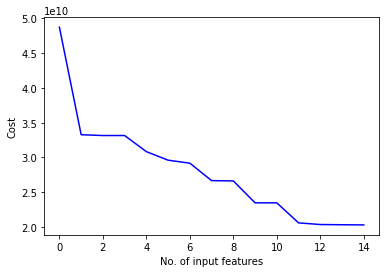

In [25]:
#try with a range of different features added to investigate the effects of learning more features

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read csv data into a dataframe
dataframe = pd.read_csv("kc_house_data.csv")
# remove unnecessary data columns
dataframe = dataframe.drop(columns="id")
dataframe = dataframe.drop(columns="date")
# remove unhelpful data columns
dataframe = dataframe.drop(columns="sqft_basement")                   #remove these lines to show why we removed them
dataframe = dataframe.drop(columns="yr_renovated")
# setup input features data and output feature data
y = dataframe["price"]
x = dataframe.drop(columns="price")

rows, columns = x.shape
column_names = list(x.columns)
J_list = []
for i in range(2, (columns+1), 1):
    
    x_i = x[column_names[0:i]]

    #now lets try with more datasets. Hopefully we can reduce the error for predicting the price by involving more variables.
    #add bias vector which is just a column of 1's
    x_i.insert(0, 'bias', [1]*rows, True)
    
    #select the columns of interest
    column_names_i = list(x_i.columns)
    x_with_titles = x_i[column_names_i]

    #get just the values of the dataframe and store them as the input matrix X
    X = x_with_titles.values

    #USE NORMAL EQUATION!
    X_transpose = np.transpose(X)
    W = ((np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y.values)))

    #calculate cost function
    error_sum = 0
    for i in range(0, rows, 1):
        error = y.values[i] - (X[i].dot(W)) #X[i].dot(W) is the same as W0*x0 + W1*x1 + ... + W16*x16
        error_sum = error_sum + (error**2)
    J = (1/(2*rows)) * error_sum

    #J = (1/(2*rows)) * np.sum(error_sq)
    print("The cost is " + str(J) + " with features " + str(column_names_i))
    J_list.append(J)
    
#PLOT GRAPH OF COST REDUCING WITH MORE FEATURES
J_range = np.array(range(0, len(J_list), 1))
J_array = np.array(J_list)

plt.plot(J_range, J_array, color = 'b')
plt.ylabel("Cost")
plt.xlabel("No. of input features")
plt.show()